In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calender


In [4]:
fraudulent_data = pd.read_csv('fraud-analytics-dataset.csv')

NameError: name 'calendar' is not defined

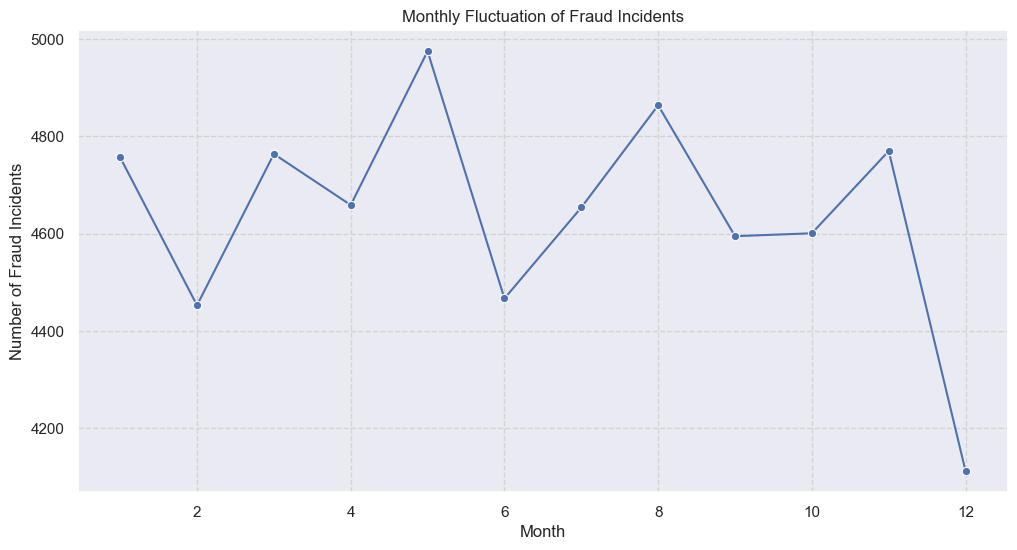

In [6]:
# Convert 'dt_txn_comp' to datetime format for date manipulation
fraudulent_data['dt_txn_comp'] = pd.to_datetime(fraudulent_data['dt_txn_comp'])

fraudulent_data['month'] = fraudulent_data['dt_txn_comp'].dt.month

fraud_counts = fraudulent_data.groupby('month').size().reset_index(name='fraud_count')

sns.set(style="darkgrid", color_codes=True,
        rc={"grid.linestyle": "--", "grid.color": "lightgray"})

plt.figure(figsize=(12, 6))


sns.lineplot(x='month', y='fraud_count', data=fraud_counts, marker='o')

# Title and axes labels
plt.title('Monthly Fluctuation of Fraud Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Fraud Incidents')

plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)

plt.grid(True)

plt.show()

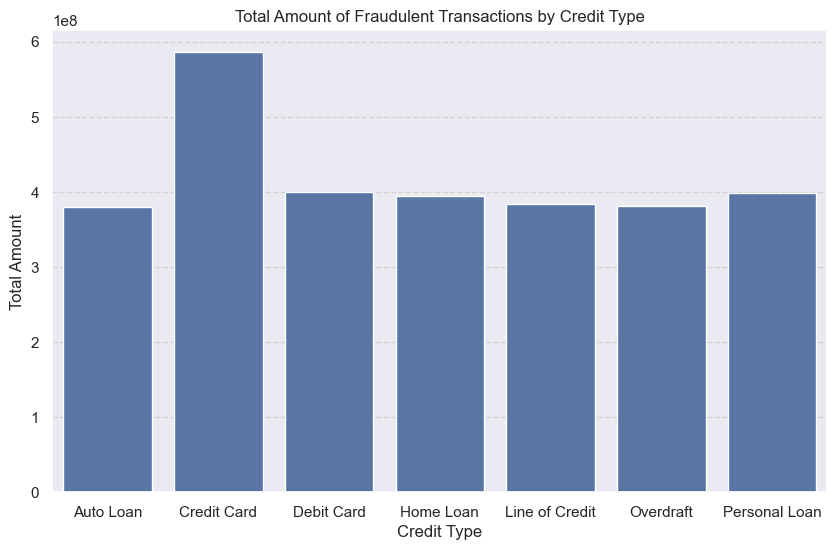

In [7]:
# Sum fraudulent amounts by credit type
fraudulent_amount_by_credit_type = fraudulent_data.groupby('cred_type')[
    'payee_settlement_amount'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='cred_type', y='payee_settlement_amount', 
            data=fraudulent_amount_by_credit_type)

plt.title('Total Amount of Fraudulent Transactions by Credit Type')
plt.xlabel('Credit Type')
plt.ylabel('Total Amount')

plt.show()  # Display the plot

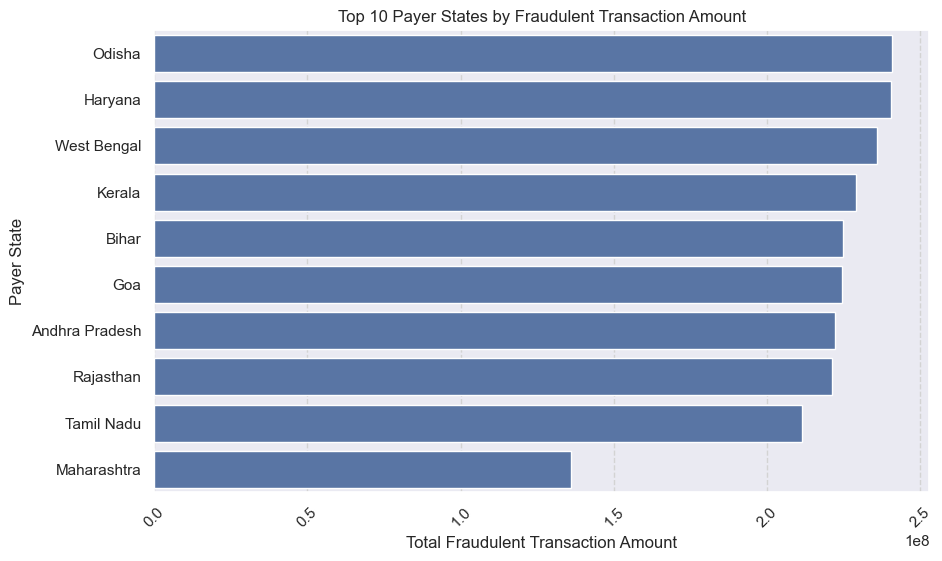

In [8]:
# Group data by 'payer_state', sum 'payee_settlement_amount', and get top 10
top_payer_states_amount = fraudulent_data.groupby('payer_state')[
    'payee_settlement_amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))

# Create a horizontal bar plot of the top 10 states
sns.barplot(x='payee_settlement_amount', y='payer_state', 
            data=top_payer_states_amount, orient='h')

# Set the plot title and axis labels
plt.title('Top 10 Payer States by Fraudulent Transaction Amount')
plt.xlabel('Total Fraudulent Transaction Amount')
plt.ylabel('Payer State')

plt.xticks(rotation=45)

plt.show()  

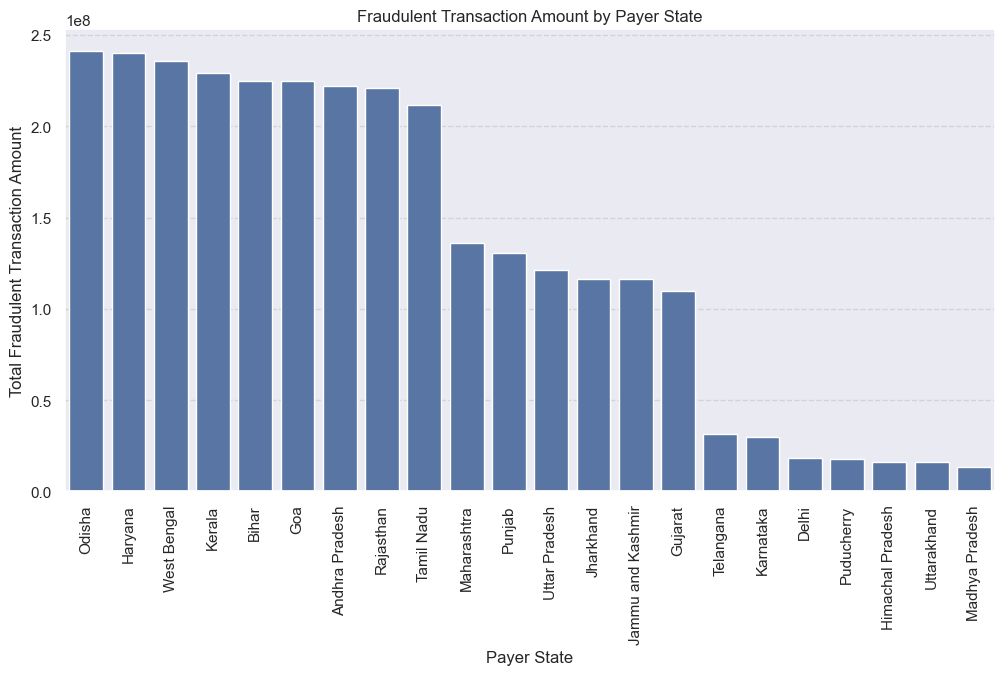

In [9]:
# Group the fraudulent data by 'payer_state' and sum up 'payee_settlement_amount'
fraudulent_amount_by_payer_state = fraudulent_data.groupby('payer_state')[
    'payee_settlement_amount'].sum().reset_index()

fraudulent_amount_by_payer_state = fraudulent_amount_by_payer_state.sort_values(
    by='payee_settlement_amount', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(x='payer_state', y='payee_settlement_amount', 
            data=fraudulent_amount_by_payer_state)

plt.title('Fraudulent Transaction Amount by Payer State')
plt.xlabel('Payer State')
plt.ylabel('Total Fraudulent Transaction Amount')

plt.xticks(rotation=90)

plt.show()  

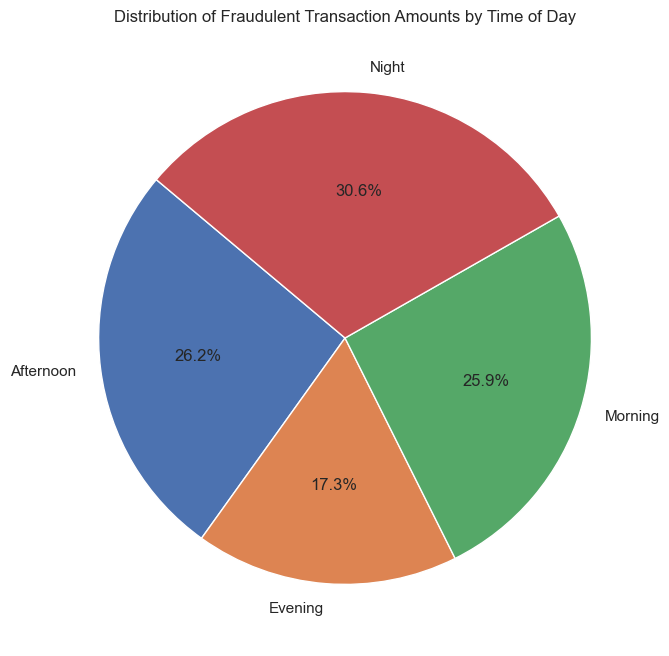

In [10]:
# Aggregate fraudulent amount by time of day
fraudulent_amount_by_time = fraudulent_data.groupby('time_of_day')[
    'payee_settlement_amount'].sum().reset_index()

# Initialize pie chart figure with specified size
plt.figure(figsize=(8, 8))

# Create pie chart for fraudulent transaction amounts by time of day
plt.pie(fraudulent_amount_by_time['payee_settlement_amount'], 
        labels=fraudulent_amount_by_time['time_of_day'],
        autopct='%1.1f%%', startangle=140)

# Title for the pie chart
plt.title('Distribution of Fraudulent Transaction Amounts by Time of Day')

plt.show()  # Display the pie chart